In [7]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import seaborn as sns
from pathlib import Path
import numpy as np 
import matplotlib


In [8]:
#import dataset
creep_df = pd.read_csv('../Data/Ti_alloys_dataset.csv')
creep_df

,Ti,Al,V,Fe,C,N,H,O,Sn,Nb,...,Cr,Solution treated temp(cel),ST time (h),Anneal temp (cel),Annealing Time (hour),Temperature of creep test (cel),Stress (Mpa),steady state strain rate (1/s),Strain to rupture (%) (Efc),creep_rupture_life
0,87.8750,6.75,4.50,0.40,0.100,0.050,0.1250,0.20,0.00,0.0,...,0.0,690,4.0,1050,0.5,700,319.0,2.090000e-03,15.80,0.01000
1,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,600,319.0,3.240000e-06,0.00,0.01167
2,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,600,250.0,4.400000e-05,0.00,0.03050
3,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,500,520.0,4.430000e-05,0.00,0.04620
4,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,700,319.0,2.130000e-03,0.00,0.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,85.9870,6.20,0.00,0.00,0.021,0.004,0.0080,0.03,1.95,0.0,...,0.0,900,1.0,580,8.0,520,310.0,1.200000e-04,0.00,1160.00000
173,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.0,0,0.0,940,4.0,455,379.0,9.160000e-07,0.00,1619.00000
174,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.0,0,0.0,1030,0.5,455,379.0,1.270000e-06,0.00,1744.00000
175,89.4100,6.00,4.00,0.25,0.080,0.050,0.0100,0.20,0.00,0.0,...,0.0,0,0.0,0,0.0,538,103.0,9.000000e-07,22.30,4681.00000


In [9]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ti                               177 non-null    float64
 1   Al                               177 non-null    float64
 2   V                                177 non-null    float64
 3   Fe                               177 non-null    float64
 4   C                                177 non-null    float64
 5   N                                177 non-null    float64
 6   H                                177 non-null    float64
 7   O                                177 non-null    float64
 8   Sn                               177 non-null    float64
 9   Nb                               177 non-null    float64
 10  Mo                               177 non-null    float64
 11  Zr                               177 non-null    float64
 12  Si                    

In [10]:
features = creep_df.iloc[:, 0:23]
targets = creep_df.iloc[:, 23]
features

,Ti,Al,V,Fe,C,N,H,O,Sn,Nb,...,B,Cr,Solution treated temp(cel),ST time (h),Anneal temp (cel),Annealing Time (hour),Temperature of creep test (cel),Stress (Mpa),steady state strain rate (1/s),Strain to rupture (%) (Efc)
0,87.8750,6.75,4.50,0.40,0.100,0.050,0.1250,0.20,0.00,0.0,...,0.00,0.0,690,4.0,1050,0.5,700,319.0,2.090000e-03,15.80
1,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,600,319.0,3.240000e-06,0.00
2,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,600,250.0,4.400000e-05,0.00
3,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,500,520.0,4.430000e-05,0.00
4,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,700,319.0,2.130000e-03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,85.9870,6.20,0.00,0.00,0.021,0.004,0.0080,0.03,1.95,0.0,...,0.00,0.0,900,1.0,580,8.0,520,310.0,1.200000e-04,0.00
173,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.00,0.0,0,0.0,940,4.0,455,379.0,9.160000e-07,0.00
174,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.00,0.0,0,0.0,1030,0.5,455,379.0,1.270000e-06,0.00
175,89.4100,6.00,4.00,0.25,0.080,0.050,0.0100,0.20,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,538,103.0,9.000000e-07,22.30


In [11]:
def coverage(y, yL, yH):
        return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

q: 0.025 | pearsonr: 0.28520840770732936
q: 0.5 | pearsonr: 0.5457850427226711
q: 0.975 | pearsonr: 0.6692633774122101
Pearson CC: 0.5457850427226711
R2 score: -0.11456268021057081
RMSE: 312.0278132204656
MAE: 156.9001787395983
Coverage: 75.0
Interval Width: 179.28653961314902
Composite Metric: 0.563894415891675


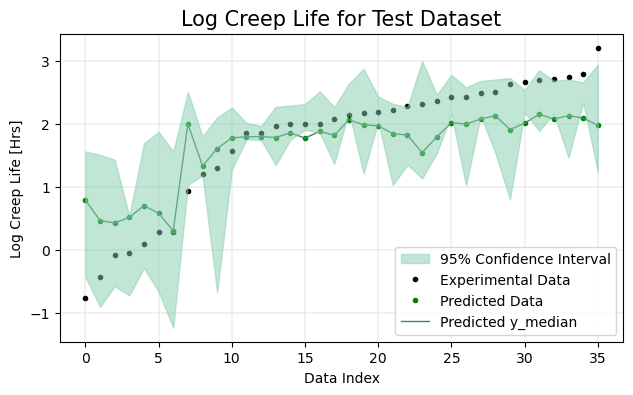

****************************************
q: 0.025 | pearsonr: 0.6771263350614847
q: 0.5 | pearsonr: 0.8691035539514573
q: 0.975 | pearsonr: 0.8508763880206668
Pearson CC: 0.8691035539514573
R2 score: 0.4753211443389823
RMSE: 148.02771181485593
MAE: 70.1821778089426
Coverage: 47.22222222222222
Interval Width: 40.277586059718985
Composite Metric: 0.3603735927627174


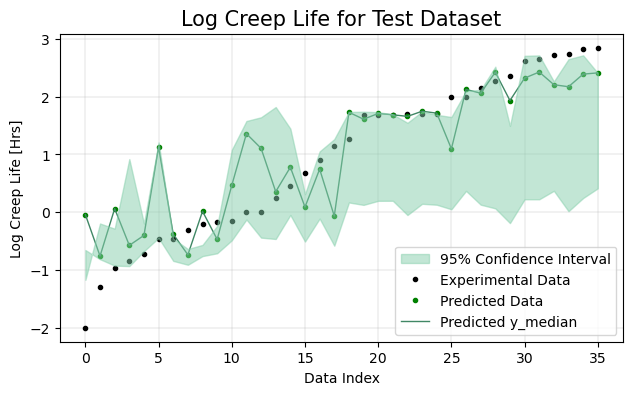

****************************************
q: 0.025 | pearsonr: 0.12193205381069519
q: 0.5 | pearsonr: 0.3028520360616642
q: 0.975 | pearsonr: 0.3054309453454577
Pearson CC: 0.3028520360616642
R2 score: 0.036966876195130505
RMSE: 231.37567030706538
MAE: 82.20716820415875
Coverage: 88.57142857142858
Interval Width: 718.0879124330158
Composite Metric: 0.6646338610734148


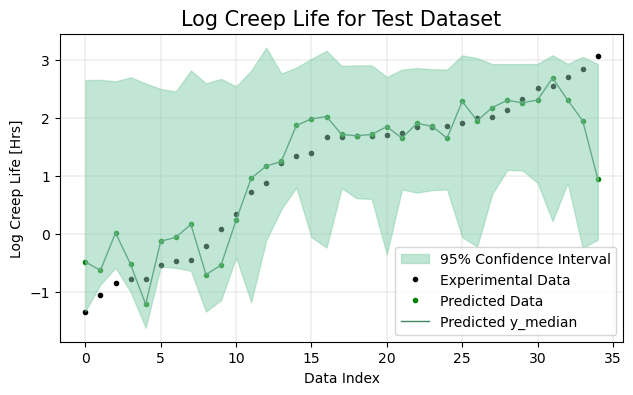

****************************************
q: 0.025 | pearsonr: -0.0037353695021407965
q: 0.5 | pearsonr: 0.3992325590399886
q: 0.975 | pearsonr: 0.3725473680388399
Pearson CC: 0.3992325590399886
R2 score: 0.029381444083220187
RMSE: 774.9672307704442
MAE: 167.35794895497307
Coverage: 91.42857142857144
Interval Width: 272.7998076267068
Composite Metric: 0.6866307086479196


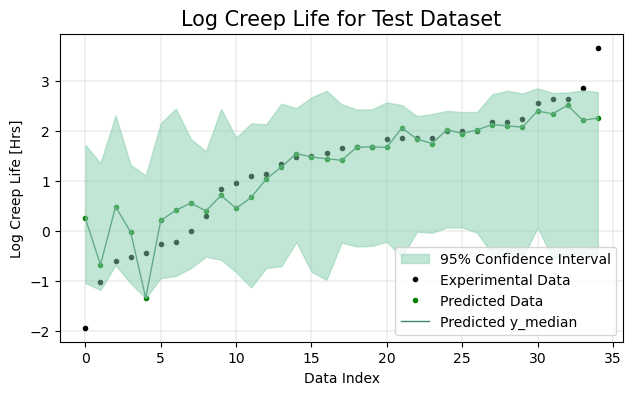

****************************************
q: 0.025 | pearsonr: -0.10387997517665812
q: 0.5 | pearsonr: 0.13568793795681508
q: 0.975 | pearsonr: 0.24705289887452056
Pearson CC: 0.13568793795681508
R2 score: -0.05960235393251101
RMSE: 842.5429484135318
MAE: 249.71636991999455
Coverage: 88.57142857142858
Interval Width: 469.95854342788357
Composite Metric: 0.6648176761012748


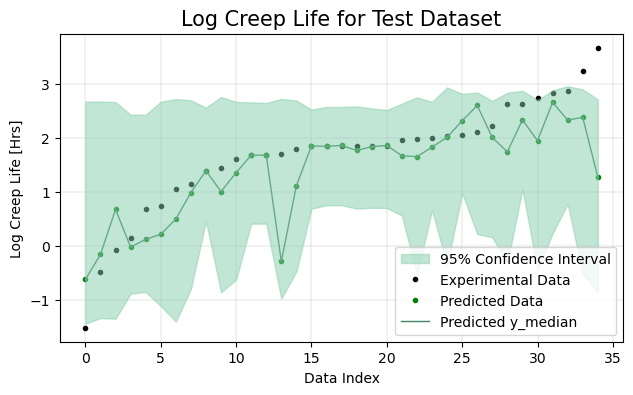

****************************************


In [12]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)


test_coverage = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)

quantiles = [0.025, 0.5, 0.975]

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):
                X_train, X_test = features.iloc[tr], features.iloc[ts]
                scale = StandardScaler()
                X_train = scale.fit_transform(X_train)
                X_test = scale.transform(X_test)
                y_train, y_test = targets.iloc[tr], targets.iloc[ts]
                X_train, X_val, y_train, y_val = train_test_split(
                        X_train, y_train, test_size=0.1)

                for q in quantiles:
                        parameters = {'loss_function': 'Quantile:alpha={:0.2f}'.format(q),
                                'num_boost_round': 5000}
                        model = CatBoostRegressor(**parameters)
                        model.fit(X_train, np.log(y_train),
                                eval_set=[(X_val, np.log(y_val))],
                                early_stopping_rounds=20,
                                verbose=False)
                        y_pred = np.exp(model.predict(X_test))
                        print(f'q: {q} | pearsonr: {pearsonr(y_test, y_pred)[0]}')
                        if q==0.025:
                           y_low = y_pred
                        elif q==0.5:
                                y_median = y_pred
                        elif q==0.975:
                               y_high = y_pred
                


                
                PearsonCC[j, i] = pearsonr(np.squeeze(y_test), np.squeeze(y_median))[0]
                R2_score[j, i] = r2_score(y_test, y_median)
                RMSE[j, i] = np.sqrt(mean_squared_error(y_test, y_median))
                MAE[j, i] = np.mean(abs(y_median-np.array(y_test)))

                print(f'Pearson CC: {PearsonCC[j, i]}')
                print(f'R2 score: {R2_score[j, i]}')
                print(f'RMSE: {RMSE[j, i]}')
                print(f'MAE: {MAE[j, i]}')

                test_coverage[j, i] = coverage(y_test, y_low, y_high)


                print(f'Coverage: {test_coverage[j, i]}')
   


                # Prediction interval width
                median_interval_width[j, i] = np.median(y_high - y_low)
                print(f'Interval Width: {median_interval_width[j, i]}')

                # Composite metric that combines the coverage and the invers of interval width
                composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
                print(f'Composite Metric: {composite_metric[j, i]}')


                # Plot the predictions
                fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
                
                iteration_list = [i for i in range(len(y_test))]   
                ## Uncertainty quantification plot
                ax[0].fill_between(iteration_list, np.log10(y_low), np.log10(y_high), alpha=0.5, color='#86cfac', zorder=5, label='95% Confidence Interval')
                ax[0].plot(iteration_list, np.log10(y_test), 'ko', markersize=3, label="Experimental Data")
                ax[0].plot(iteration_list, np.log10(y_median), 'go', markersize=3, label="Predicted Data")
                ax[0].plot(iteration_list, np.log10(y_median), '-', linewidth=1, color="#408765", label="Predicted y_median")
                ax[0].legend(loc=4, fontsize=10, frameon=True)
                ax[0].set_xlabel("Data Index", fontsize=10)
                ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
                ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
                ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')
                fig.delaxes(ax[1])

                plt.show()
                print(40*'*')



In [13]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.545785,-0.114563,312.027813,156.900179
1,0.869104,0.475321,148.027712,70.182178
2,0.302852,0.036967,231.375670,82.207168
3,0.399233,0.029381,774.967231,167.357949
4,0.135688,-0.059602,842.542948,249.716370


In [14]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)


PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)


# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   },index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,0.450532,0.24813,0.073501,0.208722,461.788275,288.797173,145.272769,65.034275


In [15]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(), 'Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Interval Width,Composite Metric
0,75.000000,179.286540,0.563894
1,47.222222,40.277586,0.360374
2,88.571429,718.087912,0.664634
3,91.428571,272.799808,0.686631
4,88.571429,469.958543,0.664818


In [16]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)
median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)
median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std,
                    'Interval Width Mean': median_interval_width_mean, 'Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Interval Width Mean,Interval Width Std,Composite Metric Mean,Composite Metric Std
0,78.15873,16.492316,336.082078,236.618321,0.58807,0.12157
